# Phonon magnitude analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon displacement vectors at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of the magnitude of these vectors for each k-point.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Change as necessary
KPT = 'Gamma'; th_min = 0.01; th_max = 7.0

In [7]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'GAMMA' else KPT
path = f'/Users/jonathanlu/Documents/tmos2_2/thspc/{KPT}/thspc_phonons.npy'
dataset = np.load(path)
ntheta, nmodes, n_r = list(dataset.shape)[:-1]
print("Dataset shape:", dataset.shape)
print("Number of sampled twist angles:", ntheta)
print("Real space mesh size:", n_r)
print("Number of modes:", nmodes)

Dataset shape: (301, 6, 1521, 3)
Number of sampled twist angles: 301
Real space mesh size: 1521
Number of modes: 6


In [8]:
max_uz = np.max(dataset[:,:,:,-1], axis=2) # maximum displacement magnitude in z-direction
mean_uz = np.mean(dataset[:,:,:,-1], axis=2) # same but average
print(f"max_uz shape: {max_uz.shape}")

max_uz shape: (301, 6)


<Figure size 432x288 with 0 Axes>

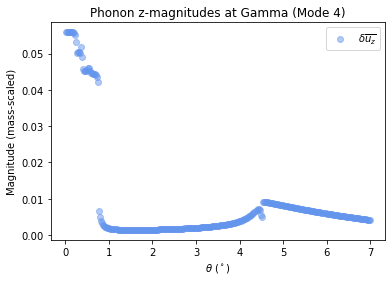

In [13]:
WHICH_MODE = 4
assert 0 <= WHICH_MODE < nmodes, "Invalid mode!"
thetas = np.linspace(th_min, th_max, ntheta)
plt.clf()
_, ax = plt.subplots()
ax.set_title(f"Phonon z-magnitudes at {log_name} (Mode {WHICH_MODE})")
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'Magnitude (mass-scaled)')
# ax.scatter(thetas, max_uz[:,WHICH_MODE], color='black', label=r'$\delta u_z^*$')
ax.scatter(thetas, mean_uz[:,WHICH_MODE], color='cornflowerblue', alpha=0.5, label=r'$\delta \overline{u_z}$')
ax.legend()
plt.show()
